<a href="https://colab.research.google.com/github/kaarthikalagappan/ai_course_projects/blob/master/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2 Problem 2

##Extending Mini Batch Gradient Descent to two weights

Code taken and adapter from Dr. Wocjan's notes (mostly from linear_regression_gradient_descent.ipynb)

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
X2 = 3.4 * np.random.rand(m, 1)
y = X + X2 + np.random.rand(m, 1)


###Random set of data

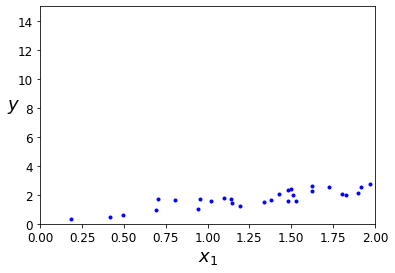

In [54]:
plt.plot(X+X2, y, "b.")
# plt.plot(X, X2, "ro")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])
X2_b = np.column_stack([np.ones((m, 1)), X2])
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
X2_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])
X2_new_b = np.column_stack([np.ones((2, 1)), X2_new])


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.026
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1)
initial_weight2 = np.random.randn(2, 1)


In [57]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)


(2, 1)
(100, 1)
(100, 1)
(2, 1)


###Modified mini batch code for n = 2 case

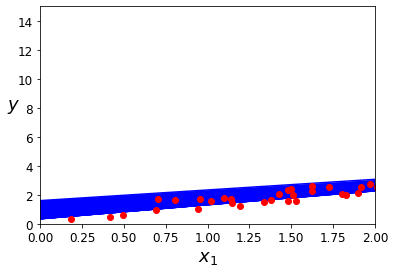

In [58]:
# mini batch code
weight = initial_weight
weight2 = initial_weight2
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    X2_b_shuffled = X2_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        x2i = X2_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * (xi+x2i).T.dot((xi+x2i).dot((weight+weight2)) - yi)
        weight = weight - lr * gradient
        weight2 = weight2 - lr * gradient
        weight_path_mgd.append(weight + weight2)

        y_predict = (X_new_b + X2_new_b).dot(weight + weight2)
        plt.plot(X_new + X2_new, y_predict, "b-")

plt.xlabel("$x_1$", fontsize=18)                 
plt.ylabel("$y$", rotation=0, fontsize=18)   
plt.plot(X+X2, y, "ro")
plt.axis([0, 2, 0, 15])                
plt.show()
